# C318 - Machine Learning - Projeto

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('files/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [75]:
df["sex"] = df["sex"].map({"female": "F", "male": "M"})
df["smoker"] = df["smoker"].map({"no": "N", "yes": "Y"})
df

,age,sex,bmi,children,smoker,region,charges
0,19,F,27.900,0,Y,southwest,16884.92400
1,18,M,33.770,1,N,southeast,1725.55230
2,28,M,33.000,3,N,southeast,4449.46200
3,33,M,22.705,0,N,northwest,21984.47061
4,32,M,28.880,0,N,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,M,30.970,3,N,northwest,10600.54830
1334,18,F,31.920,0,N,northeast,2205.98080
1335,18,F,36.850,0,N,southeast,1629.83350
1336,21,F,25.800,0,N,southwest,2007.94500


## 1. Analisando os dados

## 1.2 Análise de Variáveis Categóricas e Numéricas (Gráficos de Barras e Histogramas)

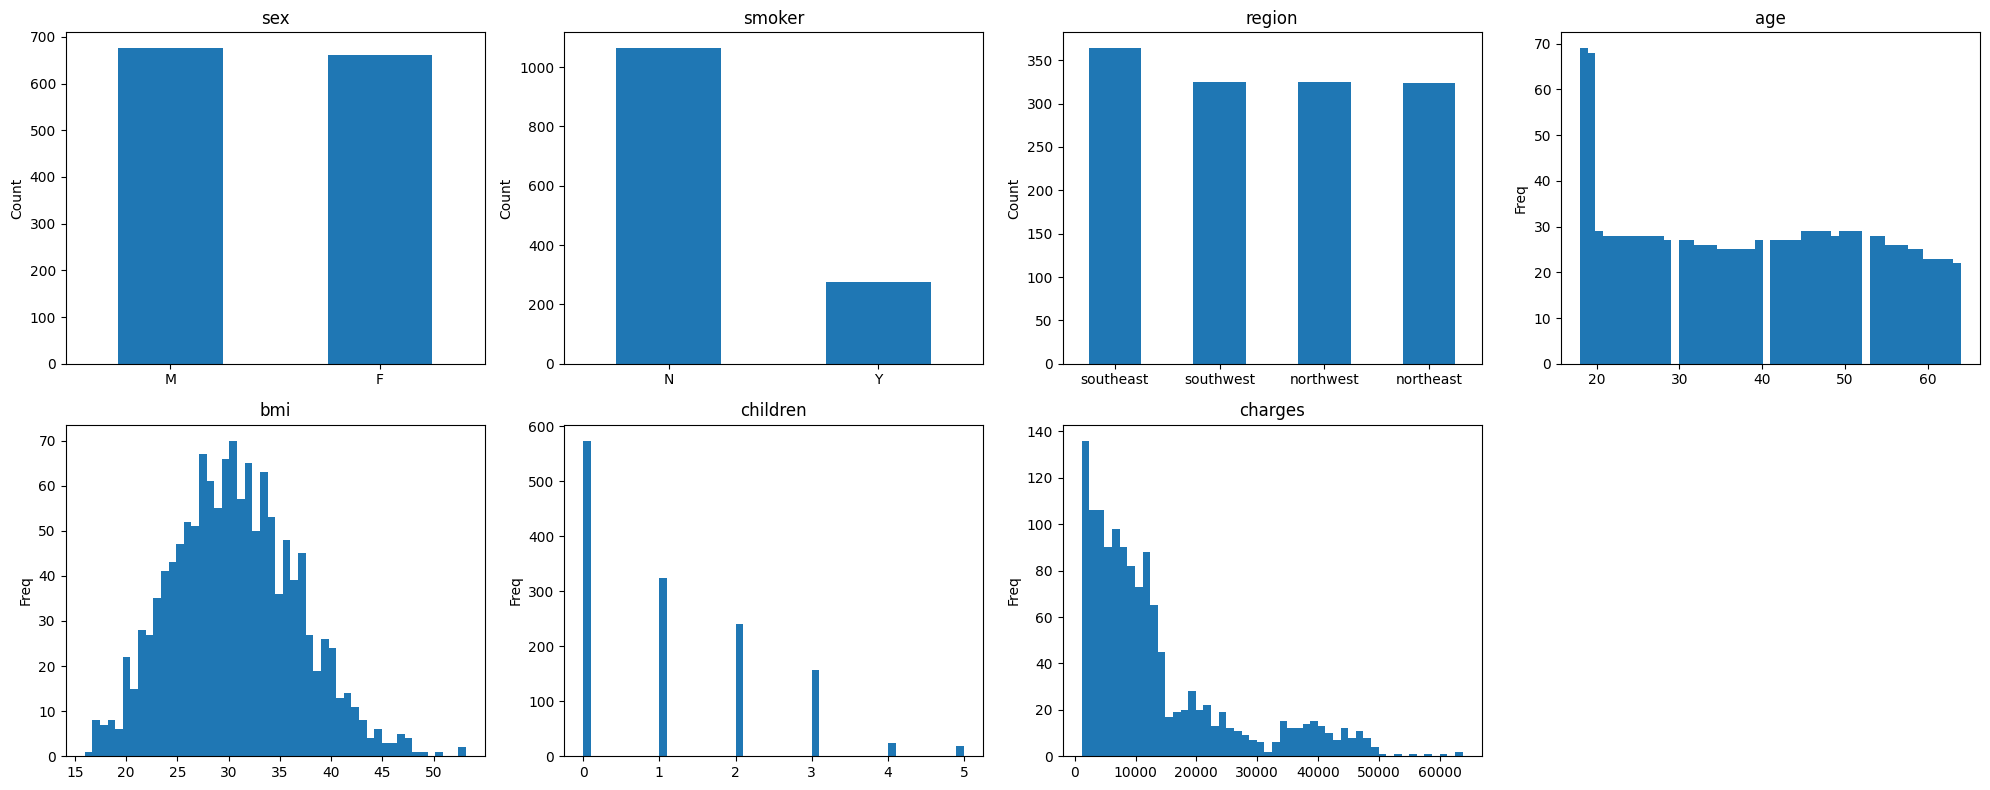

In [ ]:
# Variáveis categóricas e numéricas
categorical_cols = ["sex", "smoker", "region"]
numerical_cols = df.select_dtypes(include='number').columns.tolist()

# Total de gráficos
total_plots = len(categorical_cols) + len(numerical_cols)

# Define grid de subplots
cols = 4
rows = (total_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Gráficos de barras para variáveis categóricas
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i], rot=0)
    axes[i].set_title(col)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Count')

# Histogramas para variáveis numéricas
for j, col in enumerate(numerical_cols, start=len(categorical_cols)):
    df[col].plot(kind='hist', bins=50, ax=axes[j])
    axes[j].set_title(col)
    axes[j].set_xlabel(None)
    axes[j].set_ylabel('Freq')

# Remove subplots não usados (se sobrar espaço)
for k in range(total_plots, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()


 - Sexo: Distribuição equilibrada entre homens (M) e mulheres (F).
 - Fumante: A maioria dos indivíduos não fuma. No entanto, existe uma parcela considerável de fumantes.
 - Região: As quatro regiões estão bem distribuídas, com leve predominância do sudeste.
 - Idade: Maior concentração de pessoas entre 18 e 20 anos. A frequência diminui com a idade.
 - IMC (bmi): Distribuição aproximadamente normal, com concentração entre 25 e 35. Há outliers com IMC acima de 50.
 - Filhos: A maioria tem de 0 a 2 filhos. Poucos têm 4 ou 5.
 - Gastos médicos (charges): A maioria dos valores está abaixo de 20 mil, mas há outliers com custos muito elevados (>60 mil).

## 1.2 Análise de Boxplots

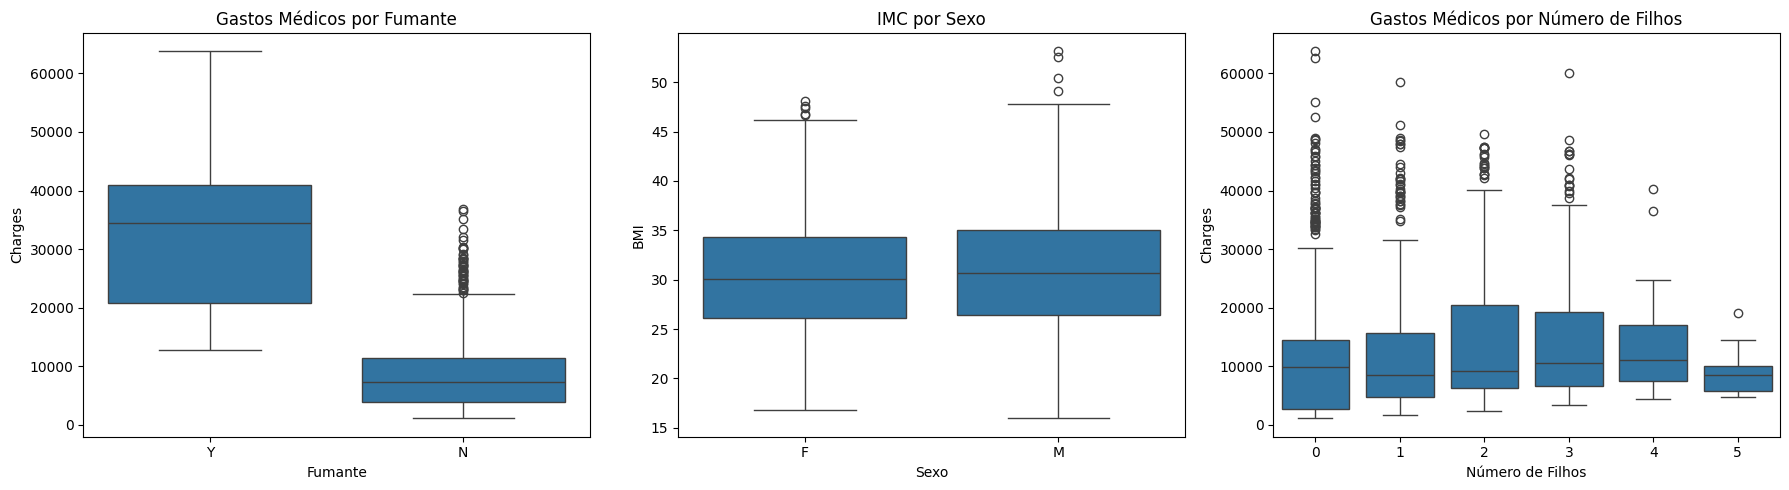

In [81]:
import seaborn as sns

plt.figure(figsize=(18, 5))

# 1. Gastos por Fumante
plt.subplot(1, 3, 1)
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Gastos Médicos por Fumante")
plt.xlabel("Fumante")
plt.ylabel("Charges")

# 2. BMI por Sexo
plt.subplot(1, 3, 2)
sns.boxplot(x="sex", y="bmi", data=df)
plt.title("IMC por Sexo")
plt.xlabel("Sexo")
plt.ylabel("BMI")

# 3. Gastos por Número de Filhos
plt.subplot(1, 3, 3)
sns.boxplot(x="children", y="charges", data=df)
plt.title("Gastos Médicos por Número de Filhos")
plt.xlabel("Número de Filhos")
plt.ylabel("Charges")

plt.tight_layout()
plt.show()


 - Fumantes vs Gastos Médicos:
   - Fumantes (Y) têm gastos médios e máximos muito mais altos.
   - Os não fumantes apresentam menor variabilidade e valores mais baixos.
   - Indica que ser fumante impacta significativamente os custos médicos.

 - Sexo vs IMC:
   - IMC é distribuído de forma semelhante entre homens e mulheres.
   - Mediana praticamente igual, com alguns outliers para ambos os sexos.
 - Número de Filhos vs Gastos Médicos:
   - Leve tendência de aumento nos gastos com mais filhos até certo ponto, mas a variação é alta em todos os grupos.
   - Gastos parecem ser mais influenciados por outros fatores (como tabagismo e idade).

## 1.3 Correlação entre Variáveis Numéricas

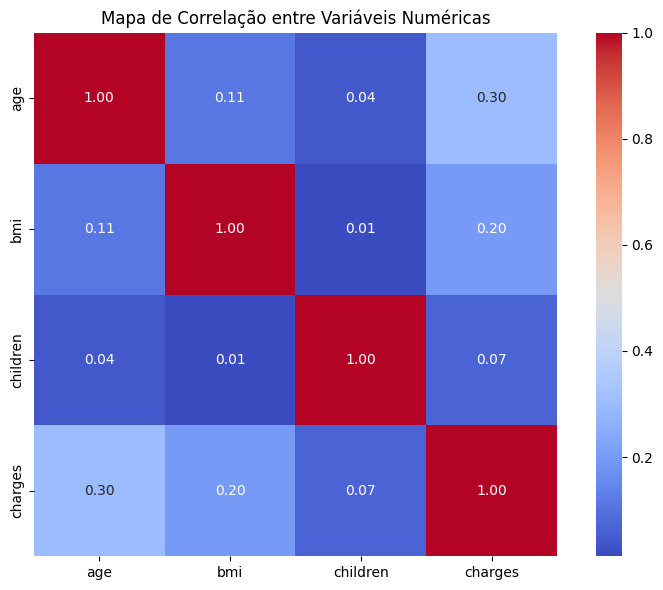

In [79]:
# Apenas variáveis numéricas
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()

 - Maior correlação com gastos (charges):
   - age: 0.30 → Correlação moderada.
   - bmi: 0.20 → Correlação fraca.
   - children: 0.07 → Correlação desprezível.
 - Conclusão: Os gastos médicos aumentam levemente com a idade e IMC, mas não são fortemente determinados apenas por variáveis numéricas.



## 1.4 Regressão Linear (Scatter Plots)

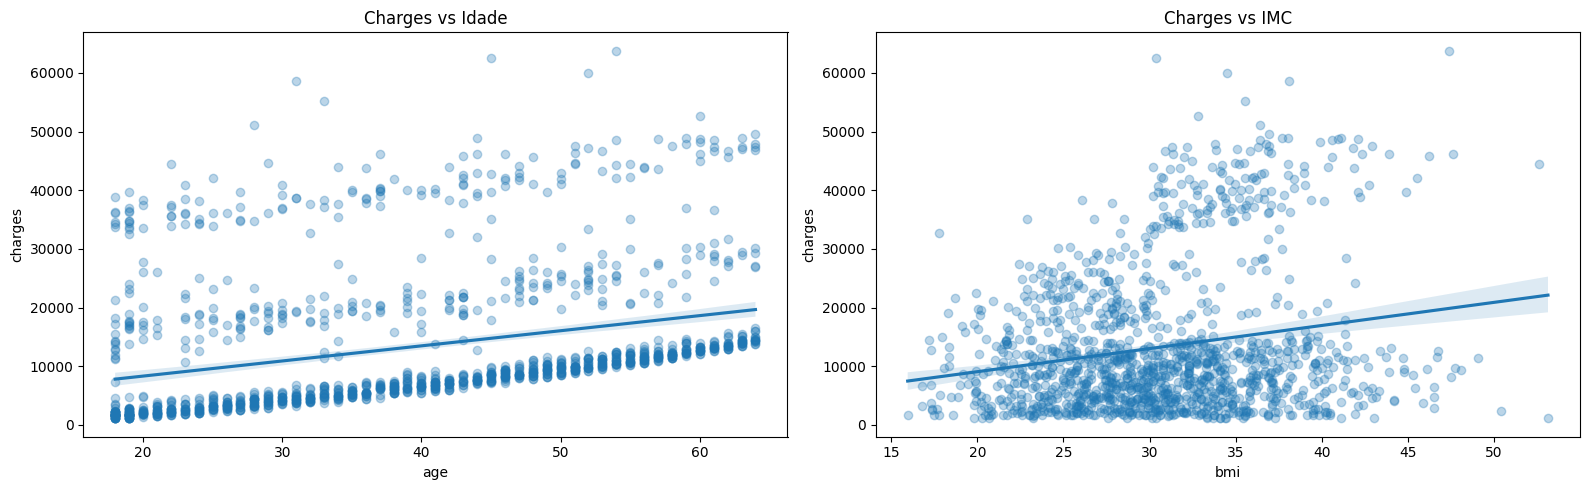

In [80]:
plt.figure(figsize=(16, 5))

# 1. Charges vs Age
plt.subplot(1, 2, 1)
sns.regplot(x="age", y="charges", data=df, scatter_kws={"alpha": 0.3})
plt.title("Charges vs Idade")

# 2. Charges vs BMI
plt.subplot(1, 2, 2)
sns.regplot(x="bmi", y="charges", data=df, scatter_kws={"alpha": 0.3})
plt.title("Charges vs IMC")

plt.tight_layout()
plt.show()


 - Gastos(charges) vs Idade(age):
   - Tendência de crescimento linear nos gastos com o aumento da idade.
   - Presença de grupos distintos: um com gastos baixos e outro com valores mais altos (possivelmente fumantes).
 - Gastos(charges) vs IMC(bmi):
   - Leve aumento nos gastos com o aumento do IMC.
   - Grande dispersão dos dados → IMC isoladamente não é bom preditor.

## 1.5 Conclusões Gerais
 - Fumante é o principal fator determinante nos custos médicos, como mostra o boxplot.
 - Idade também influencia nos gastos, com uma correlação positiva.
 - IMC tem impacto mais leve nos custos, mas pode indicar risco se muito alto.
 - Número de filhos e sexo não parecem ter grande impacto nos custos diretamente.
 - A combinação de fatores (como idade + tabagismo + IMC) provavelmente explica melhor os altos custos do que variáveis isoladas.